<a href="https://colab.research.google.com/github/cassiecinzori/ECON3916/blob/main/Deflating_History_with_FRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deflating History with FRED
### Cassandra Cinzori

#### Install the FRED API library

In [2]:
!pip install fredapi

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

fred = Fred(api_key='')

#### Ingesting the Data

In [15]:
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

df = df.dropna()

print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-06-01         31.26  321.500
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031


#### The Deflation Logic (The Theory)

In [16]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    cpi_today = cpi_col.iloc[-1]

    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

df["Real_Wage"] = get_real_wage(df["Nominal_Wage"], df["CPI"])

df.tail()





,Nominal_Wage,CPI,Real_Wage
2025-06-01,31.26,321.500,31.603325
2025-07-01,31.35,322.132,31.632132
2025-08-01,31.45,323.364,31.612130
2025-09-01,31.52,324.368,31.584426
2025-11-01,31.73,325.031,31.730000


#### Visualization



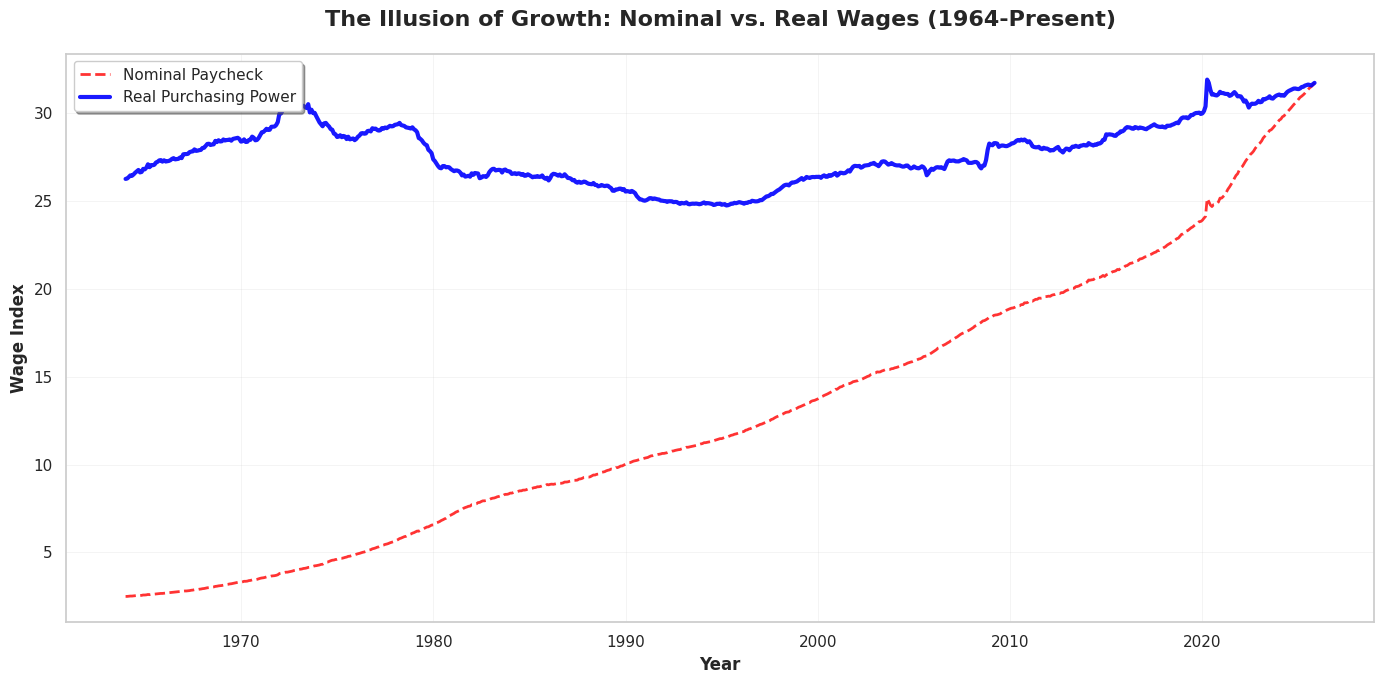

In [17]:
# Set the style
sns.set_theme(style="whitegrid")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both wage series
ax.plot(df.index, df['Nominal_Wage'],
        linestyle='--',
        color='red',
        linewidth=2,
        label='Nominal Paycheck',
        alpha=0.8)

ax.plot(df.index, df['Real_Wage'],
        linestyle='-',
        color='blue',
        linewidth=3,
        label='Real Purchasing Power',
        alpha=0.9)

# Add title and labels
ax.set_title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Wage Index', fontsize=12, fontweight='bold')

# Add legend
ax.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)

# Add annotation for 2020 pandemic spike
# Find the approximate 2020 date and corresponding Real_Wage value
pandemic_date = '2020'
if pandemic_date in df.index.astype(str):
    pandemic_value = df.loc[df.index.astype(str).str.contains('2020'), 'Real_Wage'].max()
    pandemic_idx = df[df['Real_Wage'] == pandemic_value].index[0]

    ax.annotate('Pandemic Composition Effect',
                xy=(pandemic_idx, pandemic_value),
                xytext=(pandemic_idx - pd.DateOffset(years=8), pandemic_value + 5),
                fontsize=11,
                fontweight='bold',
                color='darkgreen',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', edgecolor='darkgreen', linewidth=1.5),
                arrowprops=dict(arrowstyle='->',
                               connectionstyle='arc3,rad=0.3',
                               color='darkgreen',
                               lw=2))

# Improve grid appearance
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

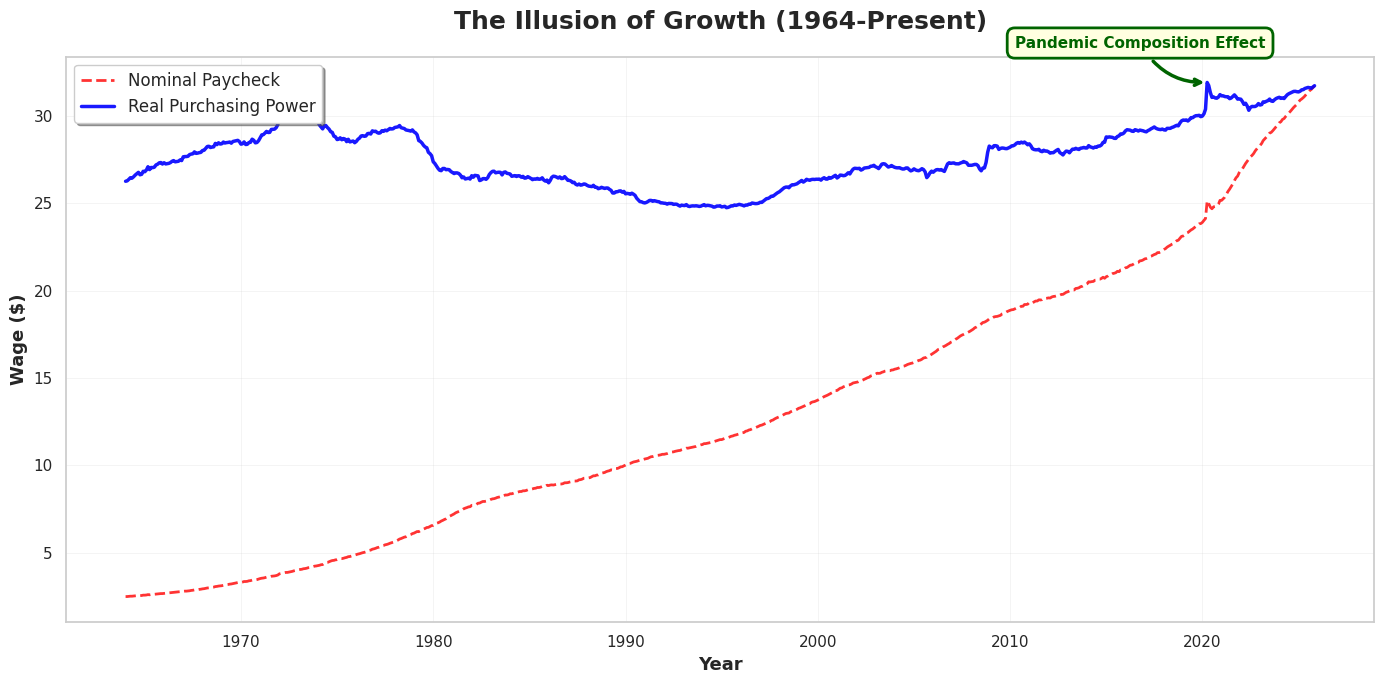

In [18]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot Nominal Wage (dashed red line)
ax.plot(df.index, df['Nominal_Wage'],
        linestyle='--',
        color='red',
        linewidth=2,
        label='Nominal Paycheck',
        alpha=0.8)

# Plot Real Wage (solid blue line)
ax.plot(df.index, df['Real_Wage'],
        linestyle='-',
        color='blue',
        linewidth=2.5,
        label='Real Purchasing Power',
        alpha=0.9)

# Add title and labels
ax.set_title('The Illusion of Growth (1964-Present)',
             fontsize=18,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Wage ($)', fontsize=13, fontweight='bold')

# Add legend
ax.legend(loc='upper left', fontsize=12, frameon=True, shadow=True)

# Add grid
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Annotate the 2020 pandemic spike
# Find 2020 data
df_2020 = df[df.index.year == 2020]
if not df_2020.empty:
    # Get the peak Real_Wage value in 2020
    peak_date = df_2020['Real_Wage'].idxmax()
    peak_value = df_2020['Real_Wage'].max()

    ax.annotate('Pandemic Composition Effect',
                xy=(peak_date, peak_value),
                xytext=(peak_date - pd.DateOffset(years=10), peak_value + 2),
                fontsize=11,
                fontweight='bold',
                color='darkgreen',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='lightyellow',
                         edgecolor='darkgreen',
                         linewidth=2),
                arrowprops=dict(arrowstyle='->',
                               connectionstyle='arc3,rad=0.3',
                               color='darkgreen',
                               lw=2.5))

# Tight layout
plt.tight_layout()

# Display
plt.show()

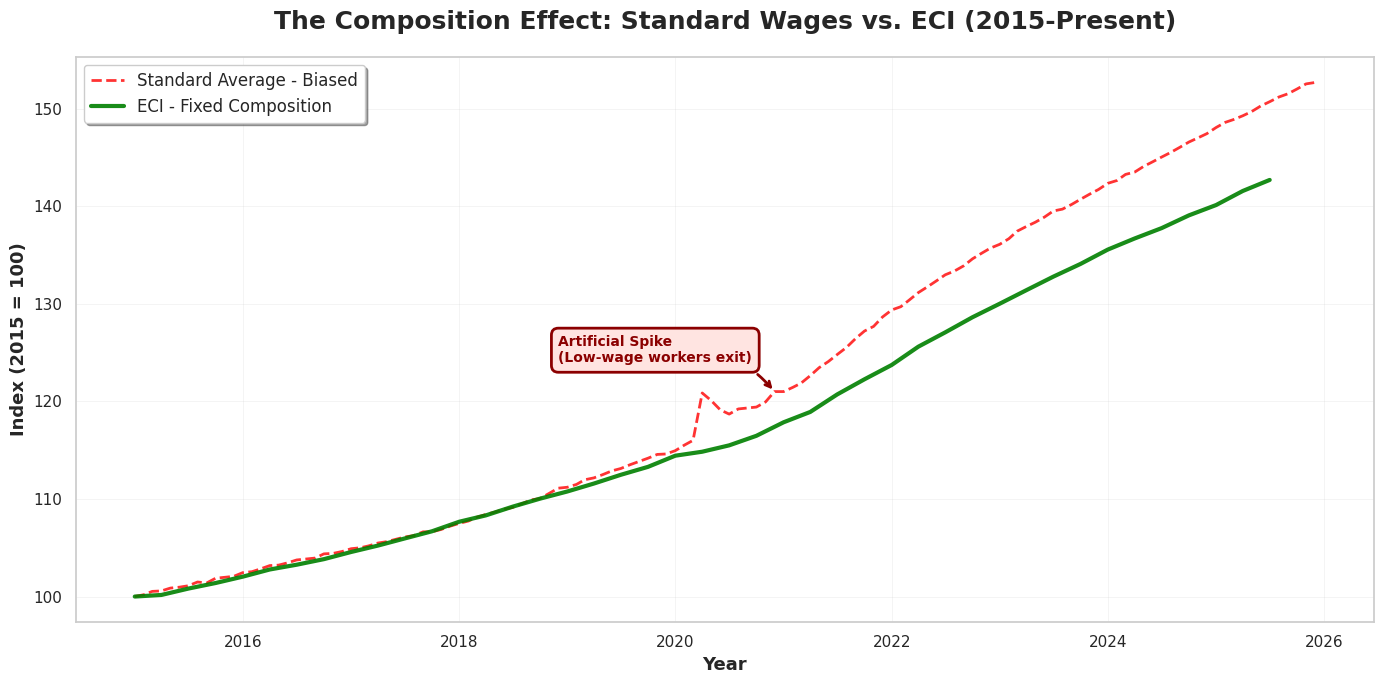

=== 2020 Divergence Summary ===
Standard Wages (Biased): 121.01
ECI (Fixed Composition): nan
Divergence: nan index points


In [20]:
# 1. Fetch Employment Cost Index (ECI) data
eci = fred.get_series('ECIWAG')

# 2. Filter both series to 2015 onwards
wages_filtered = wages[wages.index >= '2015-01-01']
eci_filtered = eci[eci.index >= '2015-01-01']

# 3. Rebase both series to 100 (first value = 100)
wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
eci_rebased = (eci_filtered / eci_filtered.iloc[0]) * 100

# 4. Create the comparison chart
fig, ax = plt.subplots(figsize=(14, 7))

# Plot Standard Average Wages (biased - red dashed)
ax.plot(wages_rebased.index, wages_rebased,
        linestyle='--',
        color='red',
        linewidth=2,
        label='Standard Average - Biased',
        alpha=0.8)

# Plot ECI (composition-adjusted - green thick)
ax.plot(eci_rebased.index, eci_rebased,
        linestyle='-',
        color='green',
        linewidth=3,
        label='ECI - Fixed Composition',
        alpha=0.9)

# Add title and labels
ax.set_title('The Composition Effect: Standard Wages vs. ECI (2015-Present)',
             fontsize=18,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Index (2015 = 100)', fontsize=13, fontweight='bold')

# Add legend
ax.legend(loc='upper left', fontsize=12, frameon=True, shadow=True)

# Add grid
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# 5. Annotate the 2020 divergence
# Find data around 2020
df_2020 = pd.DataFrame({
    'wages': wages_rebased[wages_rebased.index.year == 2020],
    'eci': eci_rebased[eci_rebased.index.year == 2020]
})

if not df_2020.empty:
    # Get a representative 2020 date (mid-year or peak divergence)
    spike_date = df_2020['wages'].idxmax()
    wages_spike_value = df_2020.loc[spike_date, 'wages']
    eci_stable_value = df_2020.loc[spike_date, 'eci']

    # Annotate the artificial spike in standard wages
    ax.annotate('Artificial Spike\n(Low-wage workers exit)',
                xy=(spike_date, wages_spike_value),
                xytext=(spike_date - pd.Timedelta(days=730), wages_spike_value + 3),
                fontsize=10,
                fontweight='bold',
                color='darkred',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='mistyrose',
                         edgecolor='darkred',
                         linewidth=2),
                arrowprops=dict(arrowstyle='->',
                               connectionstyle='arc3,rad=-0.3',
                               color='darkred',
                               lw=2))

    # Annotate the stable growth in ECI
    ax.annotate('Stable Growth\n(Composition-Adjusted)',
                xy=(spike_date, eci_stable_value),
                xytext=(spike_date + pd.Timedelta(days=547), eci_stable_value - 3),
                fontsize=10,
                fontweight='bold',
                color='darkgreen',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='honeydew',
                         edgecolor='darkgreen',
                         linewidth=2),
                arrowprops=dict(arrowstyle='->',
                               connectionstyle='arc3,rad=0.3',
                               color='darkgreen',
                               lw=2))

# Tight layout
plt.tight_layout()

# Display
plt.show()

# Print summary statistics
print("=== 2020 Divergence Summary ===")
print(f"Standard Wages (Biased): {wages_spike_value:.2f}")
print(f"ECI (Fixed Composition): {eci_stable_value:.2f}")
print(f"Divergence: {wages_spike_value - eci_stable_value:.2f} index points")